#### importing needed materail and checking

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns   


In [ ]:
pizza_sales = pd.read_excel('pizza_sales.xlsx')
pizza_sales.head(2)

In [ ]:
pizza_size = pd.read_csv('pizza_size.csv')
pizza_size.head(10)

In [ ]:
pizza_cat = pd.read_csv('pizza_category.csv')
pizza_cat.head(2)

#### checking null and duplicated info and summing them up!

In [23]:
null_vals_in_pizza_sales = pizza_sales.isnull().sum()
null_vals_in_pizza_size = pizza_size.isnull().sum()
null_vals_in_pizza_cat = pizza_cat.isnull().sum()

In [ ]:
duplicated_vals_in_pizza_sales = pizza_sales.duplicated().sum()
duplicated_vals_in_pizza_size = pizza_size.duplicated().sum()
duplicated_vals_in_pizza_cat = pizza_cat.duplicated().sum()
pizza_sales

#### slicing single columns, multi column and extracting rows from pizza_sales data frame

In [31]:
quantity_pizza_sales = pizza_sales['quantity']
quantity_pizza_sales
total_quantity_pizza_sales = quantity_pizza_sales.sum()
total_quantity_pizza_sales

49574

In [ ]:
quantity_orderID_price = pizza_sales[['quantity','order_id', 'unit_price']]
quantity_orderID_price

In [49]:
row3 = pizza_sales.loc[3]
row3and5 = pizza_sales.loc[[3,5]]
row3to5 = pizza_sales.loc[3:5]

In [53]:
row_col = pizza_sales.loc[[3,5], [   'quantity' ,'order_id']]
row_col

,quantity,order_id
3,1,2
5,1,2


In [ ]:
row_col = pizza_sales.loc[:, [   'quantity' ,'order_id']]
row_col


#### indexing

In [58]:
pizza_sales.set_index('order_id', inplace=True)

In [59]:
pizza_sales.reset_index(inplace=True)

#### truncate data frame before index=3

In [62]:
pizza_sales_truncated_before = pizza_sales.truncate(before=3)

#### truncate data frame after index=3

In [ ]:
pizza_sales_truncated_after = pizza_sales.truncate(after=3)
pizza_sales_truncated_after

#### filtering 

In [ ]:
price_more_than20 = pizza_sales[pizza_sales['unit_price']>20]
price_more_than20

#### missing values

In [79]:
dropped_null_pizza_sales = pizza_sales.dropna()
filled_null_pizza_sales = pizza_sales.fillna('0')

#### removing one row form data frame. tip! axis=0 for row and axis=1 cor column

In [83]:
filteredDF1 = pizza_sales.drop(2, axis=0)

#### removing some rows form data frame. tip! axis=0 for row and axis=1 cor column

In [84]:
filteredDF2 = pizza_sales.drop([2,3,5], axis=0)

#### removing one column form data frame base on col's name. tip!  axis=1 cor column

In [92]:
filteredDF3 = pizza_sales.drop('unit_price', axis=1)
len_piz_sales = len(pizza_sales.columns)
len_filtered3 = len(filteredDF3.columns)
print(f"number of cols in pizza sales is {len_piz_sales} while that of filtered3 is {len_filtered3}")

number of cols in pizza sales is 12 while that of filtered3 is 11


#### removing some column form data frame base on col's name.

In [97]:
# pizza_sales.columns
filteredDF4 = pizza_sales.drop([
    'order_time', 'unit_price', 'total_price','order_date','order_id',
    'order_details_id', 'pizza_id','pizza_category_id','pizza_size_id'],
 axis=1)
a = len(pizza_sales.columns)
b = len(filteredDF4.columns)
print(f"# cols in sales pizza is {a} while that of filtered4 is {b}")

# cols in sales pizza is 12 while that of filtered4 is 3


#### sorting data frame using pandas

In [99]:
sorted1 = pizza_sales.sort_values('unit_price')
sorted2 = pizza_sales.sort_values(['unit_price', 'total_price'], ascending=False)

#### grouping  based on pizza size id (count)


In [110]:
gpd_by_pizza_size_id = pizza_sales.groupby(['pizza_size_id'])
gpd_by_pizza_size_id.count()

,order_id,order_details_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_category_id,pizza_ingredients,pizza_name
pizza_size_id,,,,,,,,,,,
1,14137,14137,14137,14137,14136,14137,14137,14137,14137,14137,14137
2,15385,15385,15385,15385,15385,15385,15385,15385,15385,15385,15385
3,18526,18526,18526,18526,18526,18526,18526,18526,18526,18526,18526
4,544,544,544,544,544,544,544,544,544,544,544
5,28,28,28,28,27,28,28,28,28,28,28


#### grouping  based on pizza size id (sum)


In [114]:
pizza_sales.groupby(['pizza_size_id'])['total_price'].sum()

pizza_size_id
1    178076.50
2    249382.25
3    375318.70
4     14076.00
5      1006.60
Name: total_price, dtype: float64

In [116]:
pizza_sales.groupby(['pizza_size_id'])[['total_price', 'quantity']].sum()

,total_price,quantity
pizza_size_id,,
1,178076.50,14403
2,249382.25,15635
3,375318.70,18956
4,14076.00,552
5,1006.60,28


#### merging: creating a mergedDF including all 3 data frames

In [120]:
# pd.merge(df1, df2, common col as key )
mergedDF = pd.merge(pizza_sales,pizza_size, on='pizza_size_id')
mergedDF = pd.merge(pizza_sales,pizza_cat, on="pizza_category_id")


#### concatenating vertically

In [132]:
another_pizza_sales = pd.read_excel('another_pizza_sales.xlsx')
overall_pizza_sales = pd.concat([pizza_sales,another_pizza_sales])
overall_pizza_sales.reset_index()
a = pizza_sales.size
b = another_pizza_sales.size
c = overall_pizza_sales.size 
print(f" size of pizza sales is {a} \n size of another pizza sales is {b} \n size of concatenated is {c}")

 size of pizza sales is 583440 
 size of another pizza sales is 96 
 size of concatenated is 583536


#### concatenating horizontally

In [136]:
voucher = pd.read_excel('pizza_sales_voucher.xlsx')
concat_horizontal = pd.concat([overall_pizza_sales, voucher], axis= 1)

#### replacing text

In [137]:
replaced_text = pizza_sales['pizza_ingredients'].str.replace('feta cheese', 'Mozzarella')

#### removing white space form cols

In [138]:
pizza_sales['pizza_ingredients'] = pizza_sales['pizza_ingredients'].str.strip()

#### generating a boxplot

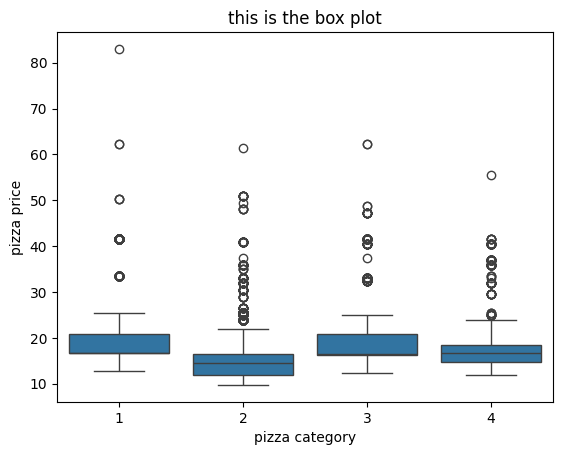

In [155]:
# concat_horizontal.columns
sns.boxplot(x='pizza_category_id', y='total_price', data=concat_horizontal)
plt.xlabel('pizza category')
plt.ylabel('pizza price')
plt.title('this is the box plot')
plt.show() 